In [27]:
import numpy as np
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [28]:
# working with chembl to get data about molecules  - EXAMPLE
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)
molecule = new_client.molecule
mols = molecule.filter(pref_name__iexact='ibuprofen')
mols[0]['atc_classifications']

# Here is how you read them:
#https://www.whocc.no/atc_ddd_index/?code=J05A&showdescription=no
# It is a hierarchy, with prefixes

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


['G02CC01', 'M01AE51', 'M02AA13', 'R02AX02', 'C01EB16', 'M01AE01']

In [29]:
# Read the list of molecules
molecules = pd.read_excel("data/gain-synonyms-list.xlsx")

In [30]:
molecules_list = list(molecules['Gain'].str.lower())
# selected_molecules = [m.split(" ")[-1] for m in molecules_list[0:7000] if (("+" not in m) and 

selected_molecules = [m.split(" ")[-1] for m in molecules_list[0:7000] if (("+" not in m) and 
                      (m.endswith("olol") or 
                      m.endswith('cillin') or 
                      m.endswith('sartan') or 
                      m.endswith('mycin') or 
                      m.endswith('vir') or 
                      m.endswith('parin') or
                      m.endswith('mab') or 
                      m.endswith('lamide') or
                      m.endswith('caine') or
                      m.endswith('bital') or
                      m.endswith('afil') or
                      m.endswith('asone') or
                      m.endswith('profen') or 
                      m.endswith('statin') or
                      m.endswith('tinib')))]

In [17]:
selected_molecules = list(set(selected_molecules))
len(selected_molecules)

196

In [18]:
selected_molecules[:50]

['beclometasone',
 'gilteritinib',
 'fostemsavir',
 'pentostatin',
 'irbesartan',
 'neratinib',
 'reviparin',
 'dactinomycin',
 'fosfomycin',
 'penbutolol',
 'sofosbuvir',
 'azithromycin',
 'nebivolol',
 'famciclovir',
 'olmesartan',
 'bictegravir',
 'pravastatin',
 'oseltamivir',
 'crizotinib',
 'dexibuprofen',
 'losartan',
 'candesartan',
 'daclatasvir',
 'ceritinib',
 'baricitinib',
 'fluticasone',
 'pindolol',
 'raltegravir',
 'atenolol',
 'abrocitinib',
 'grazoprevir',
 'selpercatinib',
 'cabotegravir',
 'natamycin',
 'dolutegravir',
 'binimetinib',
 'alectinib',
 'dorzolamide',
 'imatinib',
 'ustekinumab',
 'phenobarbital',
 'nadolol',
 'palivizumab',
 'paromomycin',
 'rituximab',
 'larotrectinib',
 'phenoxymethylpenicillin',
 'infliximab',
 'vardenafil',
 'ranibizumab']

In [20]:
ATC_codes = {}
for mol in selected_molecules:
    mols = molecule.filter(pref_name__iexact=mol)
    if len(mols)>0:
        ATC_codes[mol] = mols[0]['atc_classifications']
    else:
        print(mol + " not found")
ATC_codes

beclometasonenot found
reviparinnot found
phenoxymethylpenicillinnot found
glibenclamidenot found
clobetasonenot found
tinzaparinnot found
flucloxacillinnot found
dalteparinnot found
oxetacainenot found
lignocainenot found
valaciclovirnot found
aciclovirnot found


{'gilteritinib': ['L01EX13'],
 'fostemsavir': ['J05AX29'],
 'pentostatin': ['L01XX08'],
 'irbesartan': ['C09CA04'],
 'neratinib': ['L01EH02'],
 'dactinomycin': ['L01DA01'],
 'fosfomycin': ['J01XX01'],
 'penbutolol': ['C07AA23'],
 'sofosbuvir': ['J05AP08'],
 'azithromycin': ['J01FA10', 'S01AA26'],
 'nebivolol': ['C07AB12'],
 'famciclovir': ['J05AB09', 'S01AD07'],
 'olmesartan': [],
 'bictegravir': [],
 'pravastatin': ['C10AA03'],
 'oseltamivir': ['J05AH02'],
 'crizotinib': ['L01ED01'],
 'dexibuprofen': ['M01AE14'],
 'losartan': ['C09CA01'],
 'candesartan': ['C09CA06'],
 'daclatasvir': ['J05AP07'],
 'ceritinib': ['L01ED02'],
 'baricitinib': ['L04AA37'],
 'fluticasone': [],
 'pindolol': ['C07AA03'],
 'raltegravir': ['J05AJ01'],
 'atenolol': ['C07AB03'],
 'abrocitinib': ['D11AH08'],
 'grazoprevir': ['J05AP11'],
 'selpercatinib': ['L01EX22'],
 'cabotegravir': ['J05AJ04'],
 'natamycin': ['S01AA10', 'D01AA02', 'A07AA03', 'A01AB10', 'G01AA02'],
 'dolutegravir': ['J05AJ03'],
 'binimetinib': ['L

In [23]:
# Select highest class in the ATC hierarchy
ATC_codes_highest = {}
for mol in ATC_codes.keys():
    ATC_codes_highest[mol] = list(set([code[0:3] for code in ATC_codes[mol]]))
ATC_codes_highest

{'gilteritinib': ['L01'],
 'fostemsavir': ['J05'],
 'pentostatin': ['L01'],
 'irbesartan': ['C09'],
 'neratinib': ['L01'],
 'dactinomycin': ['L01'],
 'fosfomycin': ['J01'],
 'penbutolol': ['C07'],
 'sofosbuvir': ['J05'],
 'azithromycin': ['J01', 'S01'],
 'nebivolol': ['C07'],
 'famciclovir': ['J05', 'S01'],
 'olmesartan': [],
 'bictegravir': [],
 'pravastatin': ['C10'],
 'oseltamivir': ['J05'],
 'crizotinib': ['L01'],
 'dexibuprofen': ['M01'],
 'losartan': ['C09'],
 'candesartan': ['C09'],
 'daclatasvir': ['J05'],
 'ceritinib': ['L01'],
 'baricitinib': ['L04'],
 'fluticasone': [],
 'pindolol': ['C07'],
 'raltegravir': ['J05'],
 'atenolol': ['C07'],
 'abrocitinib': ['D11'],
 'grazoprevir': ['J05'],
 'selpercatinib': ['L01'],
 'cabotegravir': ['J05'],
 'natamycin': ['D01', 'A01', 'G01', 'S01', 'A07'],
 'dolutegravir': ['J05'],
 'binimetinib': ['L01'],
 'alectinib': ['L01'],
 'dorzolamide': ['S01'],
 'imatinib': ['L01'],
 'ustekinumab': ['L04'],
 'phenobarbital': ['N03'],
 'nadolol': ['C0

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch as torch

tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

In [66]:
#embeddings and cosines
mat = np.zeros([len(selected_molecules), 768])
i=0
print("Computing embeddings...")
for drug in selected_molecules:
    inputs = tokenizer.encode(drug, return_tensors="pt")
    with torch.no_grad():
        last_hidden_states = model(inputs)[0] # Models outputs are now tuples
        last_hidden_states = last_hidden_states.mean(1)
        mat[i,:] = last_hidden_states
        i+=1
print("Computing cosines...")
dist_out = 1-pairwise_distances(mat, metric="cosine")
dist_out

Computing embeddings...
Computing cosines...


array([[1.        , 0.86633927, 0.93455955, ..., 0.87701651, 0.92625845,
        0.90167808],
       [0.86633927, 1.        , 0.87708322, ..., 0.87340261, 0.85912274,
        0.89560609],
       [0.93455955, 0.87708322, 1.        , ..., 0.85643659, 0.88483231,
        0.88429627],
       ...,
       [0.87701651, 0.87340261, 0.85643659, ..., 1.        , 0.88795311,
        0.92344166],
       [0.92625845, 0.85912274, 0.88483231, ..., 0.88795311, 1.        ,
        0.89520139],
       [0.90167808, 0.89560609, 0.88429627, ..., 0.92344166, 0.89520139,
        1.        ]])

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(mat, metric = 'cosine', method = 'single')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


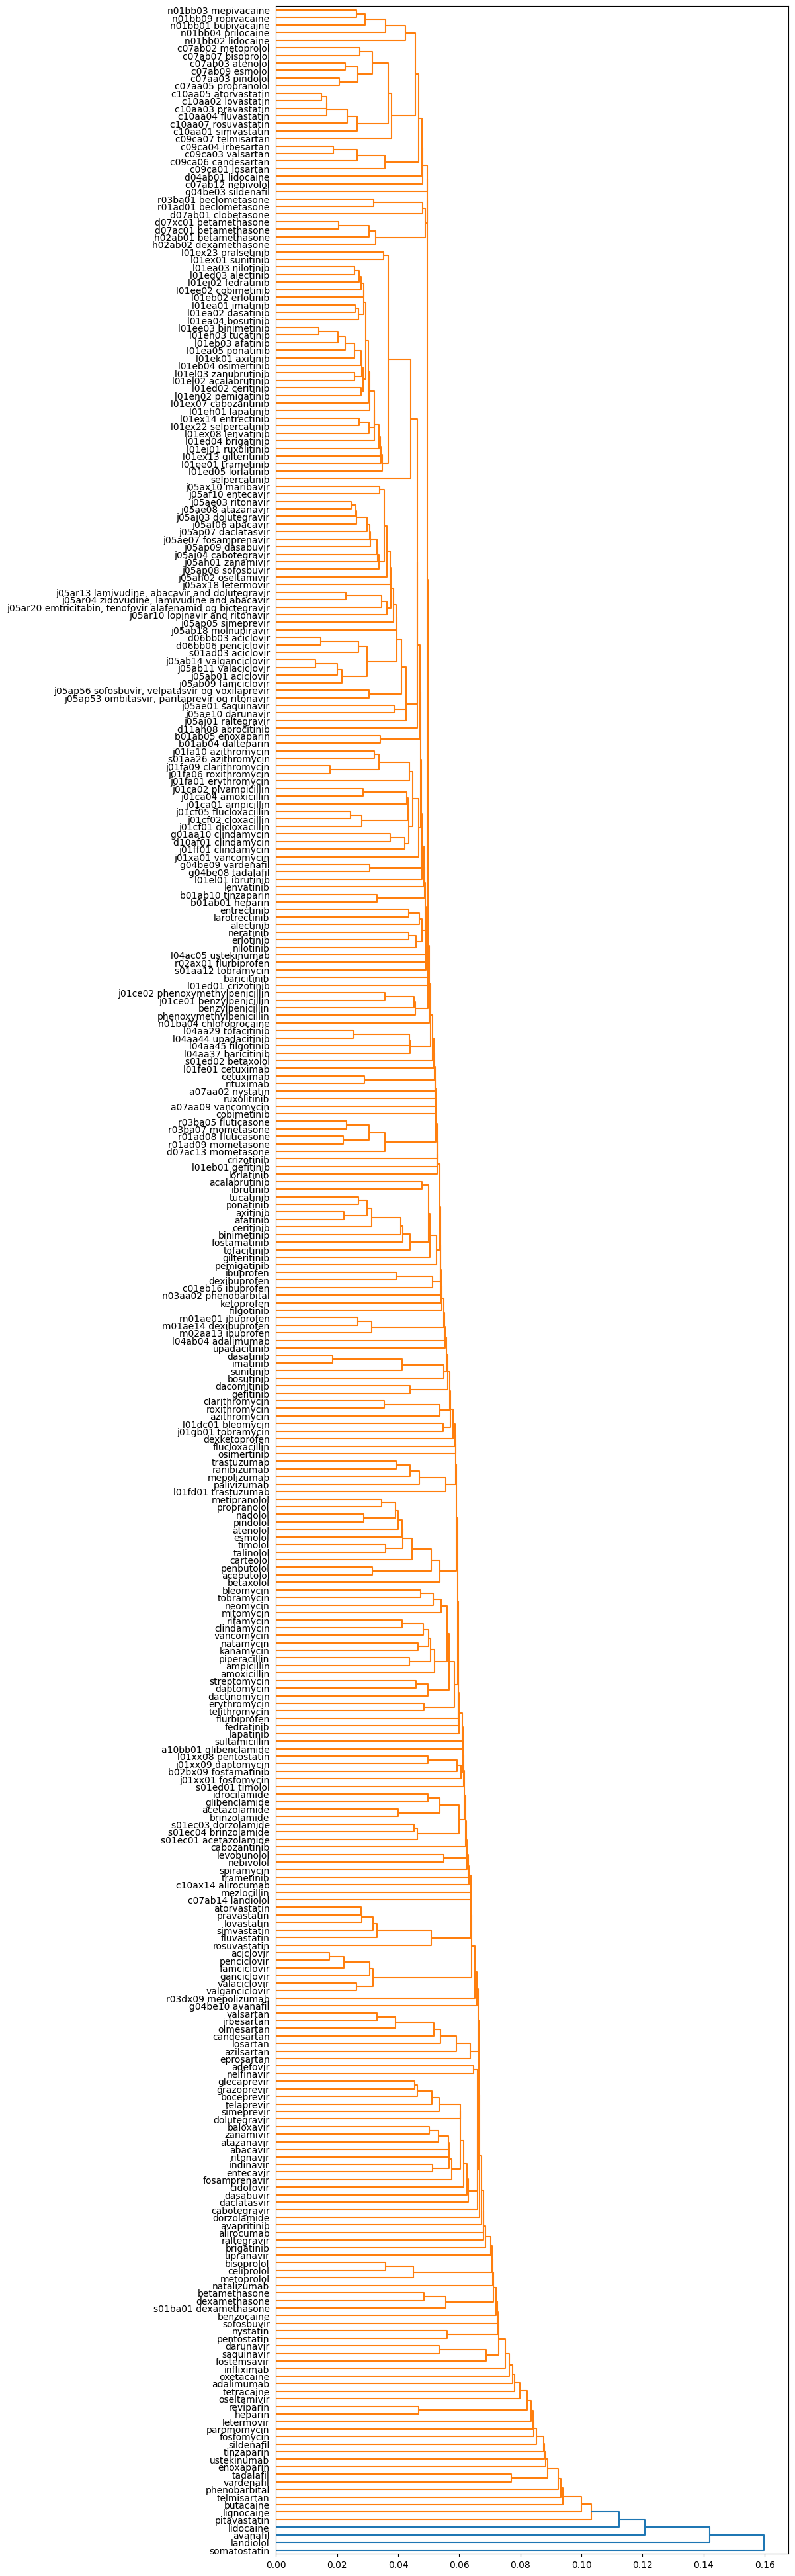

In [68]:
fig = plt.figure(figsize=(10, 50))
# dn = dendrogram(Z)
dendrogram(
            Z,
            orientation='right',
            labels=selected_molecules,
#             distance_sort='descending',
#             show_leaf_counts=False
          )
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(distance_threshold=0.06,
                                               n_clusters = None,
                                               affinity='cosine', 
                                               linkage='single',
                                               compute_distances = True)
labels = hierarchical_cluster.fit_predict(mat)


/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [70]:
labels

array([ 0,  5,  0, 66, 55, 50,  0,  0,  0,  0,  0,  4,  0,  0, 49, 13,  0,
        0, 11,  0,  0, 57,  0,  0, 43,  0,  0,  0,  0,  0,  0,  0, 61,  0,
        0,  7, 34,  0,  0,  0,  0,  0,  0,  7,  0, 45,  0,  2,  2,  0, 44,
        0,  0,  0,  2, 60, 13,  0,  4,  0,  0,  0, 11,  3, 39,  0,  0, 37,
       54,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 64,  0,  0,  0,  0,
        0, 41,  0,  0,  0,  0, 63,  0,  0,  4,  0, 62,  0, 56,  0, 35,  0,
        0,  0,  4,  0,  0,  0,  0,  0,  0,  1,  0, 38, 58,  0,  0,  0,  0,
        0,  0,  0, 28, 46,  0,  0,  0, 21,  0,  0,  0,  5, 27,  0,  0,  3,
        0,  0, 28,  0,  0,  0,  0,  2,  0,  0,  2,  0,  0,  0,  0, 47,  0,
       33, 13, 16,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       14,  0, 11,  0, 11,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
       59,  9,  0,  0, 24,  0,  4,  9, 22,  0,  3,  0,  0,  0,  6,  0, 36,
       14,  0, 10,  0,  0, 29,  0,  0,  0, 17, 65,  3,  0, 10,  0,  0,  0,
       42,  0,  0, 20, 48

In [71]:
for i in set(labels):
    print([selected_molecules[j] for j in range(len(selected_molecules)) if labels[j]==i])
    # print("\n")

['l01en02 pemigatinib', 'pemigatinib', 'j01ca04 amoxicillin', 'l01ed03 alectinib', 'j05ar10 lopinavir and ritonavir', 'palivizumab', 'roxithromycin', 'n01ba04 chloroprocaine', 'c07aa05 propranolol', 'ampicillin', 'n01bb01 bupivacaine', 'osimertinib', 'l01ex01 sunitinib', 'j01cf02 cloxacillin', 'tobramycin', 'n03aa02 phenobarbital', 'b01ab01 heparin', 'mepolizumab', 'j01cf05 flucloxacillin', 'l01eh03 tucatinib', 'l01ex23 pralsetinib', 'c09ca03 valsartan', 's01ed02 betaxolol', 'lenvatinib', 'c07ab09 esmolol', 'j01ca01 ampicillin', 'lorlatinib', 'dexibuprofen', 'l01eb01 gefitinib', 'j05ab11 valaciclovir', 'j05ah02 oseltamivir', 'flucloxacillin', 'c10aa04 fluvastatin', 'nilotinib', 'n01bb02 lidocaine', 'l01el02 acalabrutinib', 'l04aa45 filgotinib', 'd04ab01 lidocaine', 'j05ae08 atazanavir', 'c09ca06 candesartan', 'd11ah08 abrocitinib', 'esmolol', 'j01fa06 roxithromycin', 'd06bb06 penciclovir', 'h02ab02 dexamethasone', 'baricitinib', 'dexketoprofen', 'h02ab01 betamethasone', 'j05ar04 zidovu

In [73]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 20)
 
mat_small = pca.fit_transform(mat)

Y = linkage(mat_small, metric = 'cosine', method = 'single', optimal_ordering=True)

In [75]:
mat_small.shape

(337, 20)

In [76]:
Y.shape

(336, 4)

In [74]:
Y[:10]

array([[7.00000000e+01, 2.38000000e+02, 2.08655463e-02, 2.00000000e+00],
       [1.30000000e+01, 1.24000000e+02, 2.38668097e-02, 2.00000000e+00],
       [2.17000000e+02, 2.70000000e+02, 2.57155408e-02, 2.00000000e+00],
       [3.24000000e+02, 4.20000000e+01, 3.18278401e-02, 2.00000000e+00],
       [3.10000000e+01, 6.10000000e+01, 3.42215285e-02, 2.00000000e+00],
       [1.50000000e+02, 9.00000000e+01, 3.56454383e-02, 2.00000000e+00],
       [2.49000000e+02, 3.41000000e+02, 3.69041460e-02, 3.00000000e+00],
       [1.42000000e+02, 2.45000000e+02, 3.88707663e-02, 2.00000000e+00],
       [3.39000000e+02, 2.50000000e+02, 3.97180103e-02, 3.00000000e+00],
       [1.09000000e+02, 1.92000000e+02, 3.99937198e-02, 2.00000000e+00]])

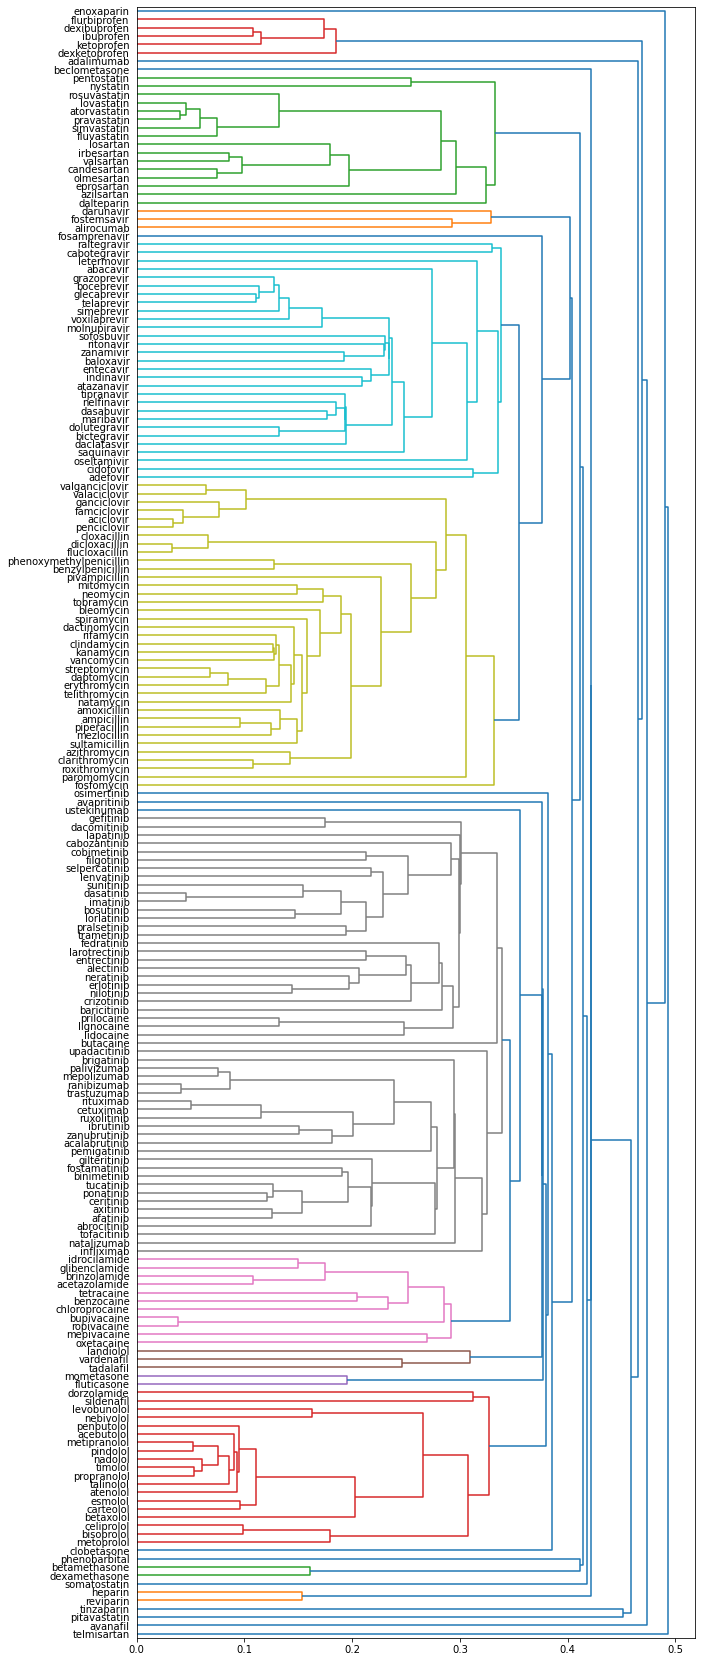

In [145]:
fig = plt.figure(figsize=(10, 30))
# dn = dendrogram(Z)
dendrogram(
            Y,
            orientation='right',
            labels=selected_molecules
#             distance_sort='descending',
#             show_leaf_counts=False
          )
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.show()

# LLM embeddings

1. Llama
2. Saudi thing (Falcon?)

# TODO Use Drug Class from Drugs.com as ground truth

In [1]:
# https://python.langchain.com/docs/modules/data_connection/text_embedding/integrations/llamacpp

from langchain.embeddings import LlamaCppEmbeddings
import numpy as np

In [2]:
# I got GGML from here https://huggingface.co/Pi3141/alpaca-native-7B-ggml/tree/397e872bf4c83f4c642317a5bf65ce84a105786e
# Need llama-cpp-python=0.1.48 for this to work
llama = LlamaCppEmbeddings(model_path="models/ggml-model-q4_0.bin")

llama.cpp: loading model from models/ggml-model-q4_0.bin
llama.cpp: can't use mmap because tensors are not aligned; convert to new format to avoid this
llama_model_load_internal: format     = 'ggml' (old version with low tokenizer quality and no mmap support)
llama_model_load_internal: n_vocab    = 32000
llama_model_load_internal: n_ctx      = 512
llama_model_load_internal: n_embd     = 4096
llama_model_load_internal: n_mult     = 256
llama_model_load_internal: n_head     = 32
llama_model_load_internal: n_layer    = 32
llama_model_load_internal: n_rot      = 128
llama_model_load_internal: ftype      = 2 (mostly Q4_0)
llama_model_load_internal: n_ff       = 11008
llama_model_load_internal: n_parts    = 1
llama_model_load_internal: model size = 7B
llama_model_load_internal: ggml ctx size = 4113748.20 KB
llama_model_load_internal: mem required  = 5809.33 MB (+ 2052.00 MB per state)
...................................................................................................
.
llama_

In [3]:
from utils.drug_data_tools import get_selected_molecules

In [4]:
selected_molecules = get_selected_molecules(filter_molecules=False)

In [5]:
llama_embeddings = []

for drug in selected_molecules:
    llama_embeddings.append(np.array(llama.embed_query(drug)))

llama_embeddings = np.array(llama_embeddings)


llama_print_timings:        load time =   244.01 ms
llama_print_timings:      sample time =     0.00 ms /     1 runs   (    0.00 ms per run)
llama_print_timings: prompt eval time =   243.61 ms /     5 tokens (   48.72 ms per token)
llama_print_timings:        eval time =     0.00 ms /     1 runs   (    0.00 ms per run)
llama_print_timings:       total time =   246.04 ms

llama_print_timings:        load time =   244.01 ms
llama_print_timings:      sample time =     0.00 ms /     1 runs   (    0.00 ms per run)
llama_print_timings: prompt eval time =   207.46 ms /     5 tokens (   41.49 ms per token)
llama_print_timings:        eval time =     0.00 ms /     1 runs   (    0.00 ms per run)
llama_print_timings:       total time =   209.51 ms

llama_print_timings:        load time =   244.01 ms
llama_print_timings:      sample time =     0.00 ms /     1 runs   (    0.00 ms per run)
llama_print_timings: prompt eval time =   208.21 ms /     5 tokens (   41.64 ms per token)
llama_print_timings

In [6]:
llama_embeddings.shape

(5747, 4096)

In [8]:
import pandas as pd

df_embeddings = pd.DataFrame(llama_embeddings, index=selected_molecules)
df_embeddings

0         1         2         3         4         5     \
aceticum     1.718058 -2.697497 -0.023630 -3.417013  0.670058  0.479221   
amoxicillin  0.997412 -2.216589  0.011650 -2.522268  0.153889  0.543214   
sulfuricum   0.335439  0.390704  1.380513 -3.503694 -0.475815  2.012880   
silicicum    1.731948 -2.344870  1.589056 -5.275558  0.545454  0.028393   
yohimbinum   2.709115 -1.605432 -0.576817 -2.955206  1.012214  1.348299   
...               ...       ...       ...       ...       ...       ...   
(6w)         2.502816 -2.591469  1.326003 -0.507242 -0.112098  1.142776   
hom          2.314177 -0.203074 -1.025025 -4.215587  1.613491  0.581401   
hom          2.314177 -0.203074 -1.025025 -4.215587  1.613491  0.581401   
hom          2.314177 -0.203074 -1.025025 -4.215587  1.613491  0.581401   
hom          2.314177 -0.203074 -1.025025 -4.215587  1.613491  0.581401   

                 6         7         8         9     ...      4086      4087  \
aceticum    -0.770256 -1.016432  0.729787 -2.129714  ... -0.559793  0.246859   
amoxicillin -1.584873 -1.352180 -1.174868 -1.428622  ...  0.016844 -0.574576   
sulfuricum   0.194774 -1.734064 -1.484523 -0.281593  ...  0.051432  0.676019   
silicicum   -0.910822 -0.088290 -0.059885 -0.714770  ... -0.881160 -1.004205   
yohimbinum   0.855728 -0.722212 -0.362434 -0.501895  ... -0.426647  0.434607   
...               ...       ...       ...       ...  ...       ...       ...   
(6w)        -0.682344 -0.331631 -0.821094  0.759528  ...  0.446615  1.099961   
hom          0.024524 -1.867019  0.224964 -1.108369  ...  1.052310  0.102160   
hom          0.024524 -1.867019  0.224964 -1.108369  ...  1.052310  0.102160   
hom          0.024524 -1.867019  0.224964 -1.108369  ...  1.052310  0.102160   
hom          0.024524 -1.867019  0.224964 -1.108369  ...  1.052310  0.102160   

                 4088      4089      4090      4091      4092      4093  \
aceticum     0.488027  2.768691 -0.778200  1.587007 -0.519027  1.354285   
amoxicillin -0.428175 -0.359254 -2.318495  0.156388  0.680021 -0.751870   
sulfuricum   0.404668  0.822964  1.352771  0.257022  0.020429  0.408622   
silicicum    0.877498  1.319285  0.120153  0.502056 -0.834355  1.437177   
yohimbinum   0.962171  1.890387  0.984796  1.762688 -1.589462  0.833430   
...               ...       ...       ...       ...       ...       ...   
(6w)         0.785105  0.660213 -1.250791 -0.582965 -0.137346  0.452656   
hom          2.881336  0.418393 -0.785187 -0.441553  0.344157  1.895107   
hom          2.881336  0.418393 -0.785187 -0.441553  0.344157  1.895107   
hom          2.881336  0.418393 -0.785187 -0.441553  0.344157  1.895107   
hom          2.881336  0.418393 -0.785187 -0.441553  0.344157  1.895107   

                 4094      4095  
aceticum    -1.305240 -0.079903  
amoxicillin  1.575621 -0.949431  
sulfuricum  -0.299887  1.853636  
silicicum    0.310319 -0.786503  
yohimbinum  -2.287348  1.303298  
...               ...       ...  
(6w)         0.323482 -1.008892  
hom         -1.044895 -1.208487  
hom         -1.044895 -1.208487  
hom         -1.044895 -1.208487  
hom         -1.044895 -1.208487  

[5747 rows x 4096 columns]

## Save embeddings to file

In [9]:
# df_embeddings.to_csv("outputs/llama-embeddings.csv", index_label="Drug Name")

## Load embeddings from file

In [45]:
df_embeddings = pd.read_csv("outputs/llama-embeddings.csv", index_col="Drug Name")
df_embeddings

0         1         2         3         4  \
Drug Name                                                                
natalizumab           2.828465 -0.323880  0.461534  1.198783  0.935547   
m01ae01 ibuprofen     1.074838  0.657038  1.360706 -5.513775 -1.665575   
c10aa07 rosuvastatin  1.518491 -2.513644  0.669459 -1.918136  0.803508   
candesartan           0.846399 -1.726462  0.906651 -1.306898  0.193972   
pemigatinib           1.657495 -1.523324  0.316984  0.202013 -0.703365   
...                        ...       ...       ...       ...       ...   
j01fa01 erythromycin  1.423937 -1.464059  1.342668 -2.036792 -0.269410   
tinzaparin            2.228670 -0.159228 -0.109560 -5.730936  0.579347   
butacaine             2.518704 -0.942618  0.123301 -2.494893  0.742145   
talinolol            -0.027222  0.328401  0.359490 -3.381045 -1.882977   
ketoprofen            1.881599  0.902603  1.361975 -6.524706 -0.819860   

                             5         6         7         8         9  ...  \
Drug Name                                                               ...   
natalizumab           0.000823  0.155675 -0.988050 -1.114025 -0.150321  ...   
m01ae01 ibuprofen     2.625445  0.869148  0.339563 -0.072241  2.003556  ...   
c10aa07 rosuvastatin  1.091942  0.397057 -0.792143 -0.150410 -1.392565  ...   
candesartan           0.240104  0.303152 -1.743013 -1.192302 -1.672895  ...   
pemigatinib           0.021658 -1.032712 -1.622851  0.565182 -2.019764  ...   
...                        ...       ...       ...       ...       ...  ...   
j01fa01 erythromycin  0.041910 -1.230801  1.151237 -0.480988 -1.620400  ...   
tinzaparin            1.020371 -0.223716  0.250876 -2.003304  0.236973  ...   
butacaine             1.234087 -2.008594 -0.561873 -1.676916 -0.065500  ...   
talinolol            -0.942354 -1.354775 -2.391139 -1.751019 -0.745730  ...   
ketoprofen            2.360509  0.837386  0.826350  0.450584  1.146160  ...   

                          4086      4087      4088      4089      4090  \
Drug Name                                                                
natalizumab           0.569156  0.244178  1.626112  0.391793 -3.204831   
m01ae01 ibuprofen     1.324995  0.487249  0.127595 -2.022812  0.551745   
c10aa07 rosuvastatin  1.292354 -0.403158  0.155575  0.822154 -1.084596   
candesartan           0.621502 -0.167140  0.252433  0.113513 -1.079827   
pemigatinib           0.295195 -0.309789 -1.277183  0.816564 -0.307367   
...                        ...       ...       ...       ...       ...   
j01fa01 erythromycin  0.861181  0.016938 -0.292618  0.285136 -0.866278   
tinzaparin           -0.811422  0.179909 -0.026103 -1.260885 -0.783256   
butacaine             0.186027  1.469089  1.468835  1.642494 -0.365990   
talinolol             0.987279  1.469541  1.499256  0.138259 -2.046890   
ketoprofen            0.419540  0.587377  0.345322 -1.226727  1.254527   

                          4091      4092      4093      4094      4095  
Drug Name                                                               
natalizumab           2.612899 -0.117829 -0.720186 -1.816628  0.691926  
m01ae01 ibuprofen    -1.475831  1.101082 -0.874682 -0.473008  1.664385  
c10aa07 rosuvastatin -2.158307  1.151778  0.199070 -0.627960 -0.777577  
candesartan          -0.638547  1.297506  0.620969  0.505722 -1.139408  
pemigatinib           1.484333  0.583064  0.173681 -1.643754  0.549972  
...                        ...       ...       ...       ...       ...  
j01fa01 erythromycin -2.114719  0.906899 -2.181357 -1.457417 -1.947545  
tinzaparin           -2.187079  1.265969 -0.064035 -0.880782  0.242898  
butacaine            -0.160554  1.155843 -0.724900 -0.382189  0.103708  
talinolol             1.591194 -1.156546  0.415519 -1.736278 -0.914798  
ketoprofen           -2.410407  1.880913 -1.555450  0.780537  2.485424  

[337 rows x 4096 columns]

### Put all pairwise similarities in a 2D matrix

In [51]:
Y = linkage(df_embeddings, metric = 'euclidean', method = 'single', optimal_ordering=True)
Y

array([[  1.        , 116.        ,  18.70123473,   2.        ],
       [204.        , 278.        ,  22.63760263,   2.        ],
       [337.        , 218.        ,  23.01140064,   3.        ],
       ...,
       [669.        ,  24.        ,  82.24903076, 335.        ],
       [670.        , 136.        ,  85.91025585, 336.        ],
       [ 37.        , 671.        ,  86.48871613, 337.        ]])

In [53]:
normalized_embeddings = df_embeddings.values / np.linalg.norm(df_embeddings.values, axis=1)[:, None]
# normalized_embeddings

In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram

def show_dendrogram_from_embeddings(embeddings_matrix, selected_molecules):
    fig = plt.figure(figsize=(10, 50))

    Y = linkage(embeddings_matrix, metric = 'cosine', method = 'complete', optimal_ordering=True)

    dendrogram(
                Y,
                orientation='right',
                labels=selected_molecules
            )
    plt.yticks(size = 10)
    plt.xticks(size = 10)
    plt.show()

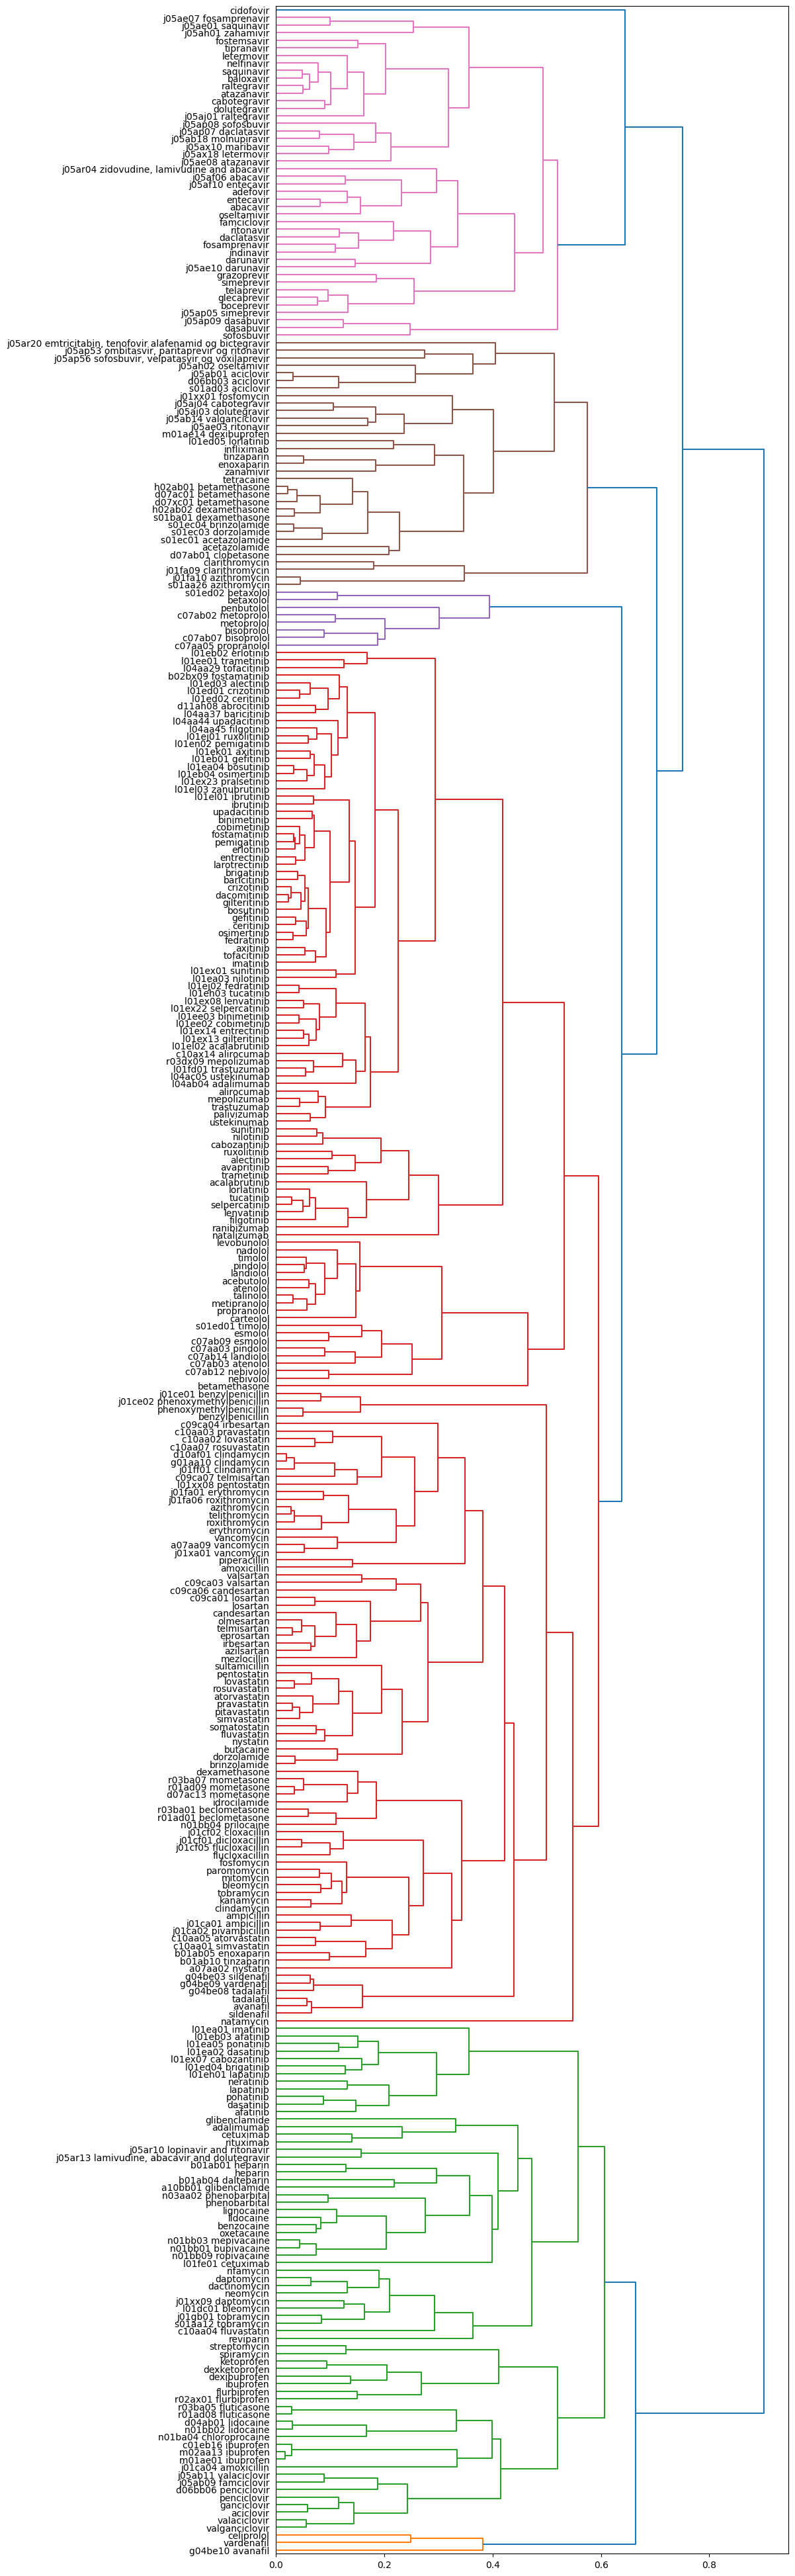

In [63]:
show_dendrogram_from_embeddings(df_embeddings.values, selected_molecules)

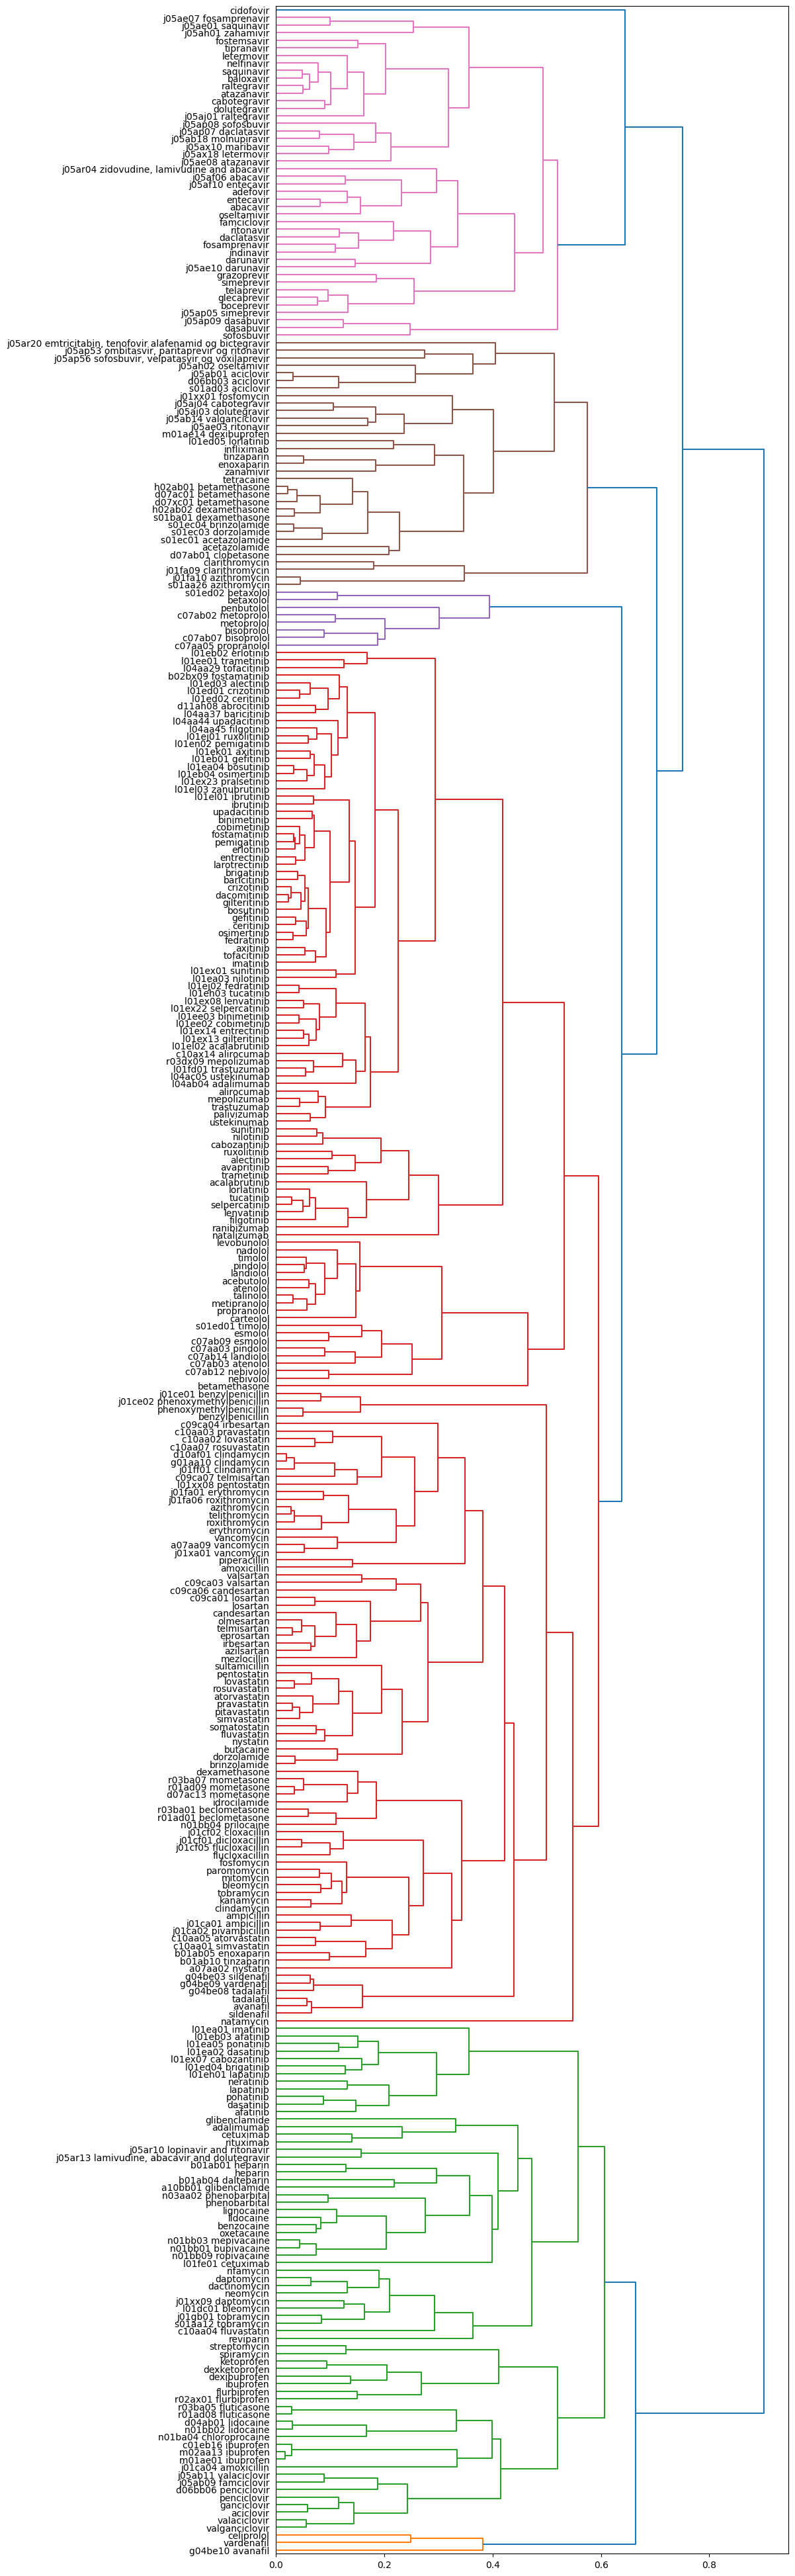

In [64]:
show_dendrogram_from_embeddings(normalized_embeddings, selected_molecules)

# Verifying embeddings by comparing them to Drug Class from Drugs.com data


TODO
1. Match drug names between Drugs.com and CSV file
2. Count how many drugs match perfectly
3. Extract Drug Class from HTML files
4. Use as ground truth to evaluate embeddings

1. Match drug names between Drugs.com and CSV file
2. Count how many drugs match perfectly

In [31]:
from utils import html_tools

In [32]:
drugs_com_drug_names = html_tools.get_unique_drugs()
list(drugs_com_drug_names)[:10]

['librax',
 'factor-xiii',
 'temodar',
 'tivdak',
 'brotapp-dm',
 'shingrix',
 'stannous-fluoride-oral-rinse',
 'maxalt-mlt',
 'roflumilast',
 'omnipred-ophthalmic']

In [33]:
# Intersection of drugs.com and CSV dataset by Drug Name
intersection = set(selected_molecules).intersection(drugs_com_drug_names)

print("There are", len(intersection), "drugs that match between Drugs.com and the CSV dataset")
print(intersection)

There are 112 drugs that match between Drugs.com and the CSV dataset
{'pitavastatin', 'amoxicillin', 'telmisartan', 'dacomitinib', 'sunitinib', 'mometasone', 'penciclovir', 'erlotinib', 'pindolol', 'piperacillin', 'trastuzumab', 'telithromycin', 'fosfomycin', 'nystatin', 'alectinib', 'streptomycin', 'bupivacaine', 'tofacitinib', 'trametinib', 'baloxavir', 'nebivolol', 'flurbiprofen', 'phenobarbital', 'ganciclovir', 'raltegravir', 'nilotinib', 'ibuprofen', 'afatinib', 'atazanavir', 'alirocumab', 'rosuvastatin', 'adalimumab', 'acalabrutinib', 'ponatinib', 'cabotegravir', 'ketoprofen', 'dalteparin', 'mitomycin', 'levobunolol', 'clarithromycin', 'molnupiravir', 'maribavir', 'selpercatinib', 'vardenafil', 'larotrectinib', 'telaprevir', 'zanamivir', 'atorvastatin', 'ibrutinib', 'irbesartan', 'cabozantinib', 'abrocitinib', 'oseltamivir', 'rituximab', 'tucatinib', 'simvastatin', 'imatinib', 'dexamethasone', 'valganciclovir', 'sildenafil', 'ruxolitinib', 'tipranavir', 'entecavir', 'pentostatin'

<font color="orange">3. Extract Drug Class from HTML files</font>

In [34]:
drugs_html = html_tools.get_all_drugs_html("data/drugs/")

In [8]:
len(drugs_html)

15636

Skip this, I have saved the results to CSV - see below

In [9]:
# # This took 4min 45s to run on Macbook M1 Pro
# # TODO parallelize?

# drugs_and_classes = {}
# for drug in drugs_html:
#     # print(drug)
#     drug_class = html_tools.get_drug_class_name(drugs_html[drug], print_warnings=False)
#     if drug_class is not None:
#         drugs_and_classes[drug] = drug_class[0]

In [ ]:
# df = pd.DataFrame(drugs_and_classes.values(), index=drugs_and_classes.keys())

# # Replace the weird URL with the drug name
# new_index = [html_tools.replace_url_w_drug_name(key) for key in df.index]

# df.index = new_index

# df = df.rename(columns={0: "Drug Class"})
# df.index.name = "Drug Name"

# # df.to_csv("outputs/drug-classes.csv")

# df